Tomando los datos del set Car Insurance Claim contesta los siguientes puntos utilizando como
herramienta cualquier lenguaje para análisis de datos (Python, R, SQL, Julia, etc). El set de datos incluye
las siguientes variables:

1. policy id: Identificador único del titular de la póliza.
2. policy tenure: Periodo de tiempo de la póliza.
3. age of car: Edad normalizada del coche en años.
4. age of policyholder: Edad normalizada del titular de la póliza en años.
5. area cluster: Cluster o zona geográfica del titular de la póliza.
6. population density: Densidad poblacional de la ciudad del titular.
7. make: Fabricante del coche (codificado).
8. segment: Segmento del coche (A/B1/B2/C1/C2).
9. model: Nombre del modelo del coche (codificado).
10. fuel type: Tipo de combustible usado por el coche.
11. max torgue: Máximo torque generado por el coche (Nm @ rpm).
12. max power; Potencia máxima generada por el coche (bhp @ rpm).
13. engine type: Tipo de motor usado en el coche.
14. airbags: Número de airbags instalados en el coche.
15. transmission type: Tipo de transmisión del coche.
16. is claim: compensació por daños o pérdidas.

Para todos los puntos deben agregar el código o pasos con los que obtuvieron el resultado. Pueden
pegarlos en este file y además enviar su script (R, .pv) ,jupyer notebook (.ipynb), quarto (.gmd), etc.
Además, se debe enviar el nuevo data set con lo solicitado en el punto 1.c.

1. Limpieza de Datos
a. ¿Existen valores faltantes en alguna de las variables?
b. En caso de existir, ¿Podemos hacer algo para resolverlo?
Para la variable max power (potencia máxima del motor), divide el campo en dos: caballos
de fuerza (bhp) y revoluciones por minuto (rpm).
Hint: Sepáralos por el patrón @

2. 
Para este análisis se debe tomar en cuenta que la variable de interés es "is_claim". Esta variable
representa si el asegurado solicita a la compañía de seguros un pago o compensación por los daños o pérdidas. Valor de 1 si el asegurado presento reclamación y valor de 0 si no presento reclamación.

a. ¿Cuáles son los principales patronés que podemos observar entre los asegurados que
presentaron alguna reclamación y los que no presentaron?
b. ¿Cómo se asocian las características del vehículo como la antiguedad, transmisión
automática, bolsas de aire, cilindros en la probabilidad de presentar un claim?
(Presentar visualizaciones)

3. Modelado de Datos:
a. ¿Qué tipo de modelo de datos crees que es el más apropiado para este caso?
b. ¿Qué tipo de variables crees que son las más relevantes para predecir el claim?
c. ¿Qué tipo de variables crees que son las menos relevantes para predecir el claim?
d. ¿Qué tipo de variables crees que son las más relevantes para predecir el claim?
e. ¿Qué tipo de variables crees que son las menos relevantes para predecir el claim?



In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display



In [29]:
df = pd.read_csv("Data Analytics Analyst Assestment.csv")

display(df.head())


policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags  cylinder transmission_type  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2         3            Manual   
1  40.36bhp@6000rpm   F8D Petrol Engine        2         3            Manual   
2  40.36bhp@6000rpm   F8D Petrol Engine        2         3            Manual   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2         4         Automatic   
4  67.06bhp@5500rpm             1.0 SCe        2         3         Automatic   

   is_claim  
0         0  
1         0  
2         0  
3         0  
4         0

In [30]:
# Denormalize the fields
df['policy_tenure'] = (df['policy_tenure'] * 12).round().astype(int)  # 0 to 30 years
df['age_of_car'] = (df['age_of_car'] * 100).round().astype(int)  # 0 to 20 years
df['age_of_policyholder'] = (df['age_of_policyholder'] * 100).round().astype(int)  # 18 to 80 years
display(df.head())

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001              6           5                   64           C1   
1   ID00002              8           2                   38           C2   
2   ID00003             10           2                   38           C3   
3   ID00004             11          11                   43           C4   
4   ID00005              7          11                   63           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags  cylinder transmission_type  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2         3            Manual   
1  40.36bhp@6000rpm   F8D Petrol Engine        2         3            Manual   
2  40.36bhp@6000rpm   F8D Petrol Engine        2         3            Manual   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2         4         Automatic   
4  67.06bhp@5500rpm             1.0 SCe        2         3         Automatic   

   is_claim  
0         0  
1         0  
2         0  
3         0  
4         0

Primer paso: LIMPIEZA DE DATOS

a) existe datos nulos en df?

b)si esxiten datos nulos, como los manejas?

c) Para la variale Max Power, divide el campo en 2: caballos de fuerza y revoluciones por minuto (rpm), Separalos por el patron @

In [31]:

# a) Verificar datos nulos
null_check = df.isnull().sum()
print("Datos nulos por columna:")
print(null_check)

Datos nulos por columna:
policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
area_cluster           0
population_density     0
make                   0
segment                0
model                  0
fuel_type              0
max_torque             0
max_power              0
engine_type            0
airbags                0
cylinder               0
transmission_type      0
is_claim               0
dtype: int64


In [32]:

# b) Manejo de datos nulos
if null_check.any():
    print("\nManejando datos nulos...")
    # Para variables numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    
    # Para variables categóricas
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].fillna('Desconocido')
    print("Datos nulos imputados")
else:
    print("\nNo hay datos nulos en el DataFrame")



No hay datos nulos en el DataFrame


In [33]:
df['max_power']

0         40.36bhp@6000rpm
1         40.36bhp@6000rpm
2         40.36bhp@6000rpm
3         88.50bhp@6000rpm
4         67.06bhp@5500rpm
               ...        
58587     67.06bhp@5500rpm
58588     40.36bhp@6000rpm
58589     40.36bhp@6000rpm
58590     88.50bhp@6000rpm
58591    113.45bhp@4000rpm
Name: max_power, Length: 58592, dtype: object

In [34]:
df['caballos_fuerza-bhp'] = pd.to_numeric(
    df['max_power'].str.split('@').str[0].str.replace('bhp', '', regex=False).str.strip(),
    errors='coerce'
)

df['revoluciones/min-rpm'] = pd.to_numeric(
    df['max_power'].str.split('@').str[1].str.replace('rpm', '', regex=False).str.strip(),
    errors='coerce'
)

In [36]:
#df['caballos_fuerza-bhp']
df[['caballos_fuerza-bhp','revoluciones/min-rpm']]


caballos_fuerza-bhp  revoluciones/min-rpm
0                    40.36                  6000
1                    40.36                  6000
2                    40.36                  6000
3                    88.50                  6000
4                    67.06                  5500
...                    ...                   ...
58587                67.06                  5500
58588                40.36                  6000
58589                40.36                  6000
58590                88.50                  6000
58591               113.45                  4000

[58592 rows x 2 columns]

In [ ]:
#df['caballos_fuerza']
#df['revoluciones/min']


#df['revoluciones/min-rpm'] = df['revoluciones/min-rpm'].str.replace('rpm', '', regex=False).str.strip()
#df['caballos_fuerza-bhp'] = df['caballos_fuerza-bhp'].str.replace('bhp', '', regex=False).str.strip()

##DROP
#df.drop('revoluciones/min-rpm', axis=1, inplace=True)
#df.drop('caballos_fuerza-bhp', axis=1, inplace=True)



In [37]:
import plotly.express as px
# Lista de columnas numéricas (excluyendo 'is_claim' si es binaria)
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if df[col].nunique() > 2]


# 2. Versión separada por reclamaciones (is_claim) con Plotly
if 'is_claim' in df.columns: # Verificar si 'is_claim' existe
    for col in numeric_cols:
        fig = px.box(df, x='is_claim', y=col,
                     title=f'Outliers en {col} por Reclamación',
                     labels={'is_claim': 'Reclamación (0=No, 1=Sí)'},
                     color='is_claim')  # Colorear los box plots por 'is_claim'
        fig.show()


In [71]:
numeric_cols

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'caballos_fuerza-bhp',
 'revoluciones/min-rpm']

In [38]:
## 2. Función para detectar outliers usando el método IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

## 3. Detección de outliers por columna
outliers_dict = {}
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    if not outliers.empty:
        outliers_dict[col] = outliers
        print(f"\nOutliers en {col}: {len(outliers)} registros")
        print(outliers[[col]].describe())


## 4. Eliminación de outliers (creando nuevo dataframe)
df_clean = df.copy()
for col in outliers_dict.keys():
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df_clean[~((df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR)))]

print(f"\nRegistros originales: {len(df)}")
print(f"Registros después de eliminar outliers: {len(df_clean)}")
print(f"Registros eliminados: {len(df) - len(df_clean)}")


Outliers en age_of_car: 269 registros
       age_of_car
count  269.000000
mean    30.925651
std      9.870904
min     25.000000
25%     26.000000
50%     29.000000
75%     31.000000
max    100.000000

Outliers en age_of_policyholder: 221 registros
       age_of_policyholder
count           221.000000
mean             86.149321
std               3.492897
min              83.000000
25%              84.000000
50%              85.000000
75%              88.000000
max             100.000000

Outliers en population_density: 3647 registros
       population_density
count         3647.000000
mean         72369.238826
std           2686.546086
min          65567.000000
25%          73430.000000
50%          73430.000000
75%          73430.000000
max          73430.000000

Registros originales: 58592
Registros después de eliminar outliers: 54480
Registros eliminados: 4112


In [39]:

## 6. Nueva división por quejas (is_claim) en el dataset limpio
claim_clean = df_clean[df_clean['is_claim'] == 1]
no_claim = df_clean[df_clean['is_claim'] == 0]


In [40]:
print("\nDistribución en dataset limpio:")
print(f"Con reclamación: {len(claim_clean)} ({len(claim_clean)/len(df_clean)*100:.2f}%)")
print(f"Sin reclamación: {len(no_claim)} ({len(no_claim)/len(df_clean)*100:.2f}%)")



Distribución en dataset limpio:
Con reclamación: 3545 (6.51%)
Sin reclamación: 50935 (93.49%)


In [41]:
print(claim_clean)
print(no_claim)

      policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
12      ID00013              1           3                   48           C3   
19      ID00020              9           9                   39           C5   
21      ID00022              6           0                   62           C4   
23      ID00024             12           8                   58           C2   
24      ID00025              0           1                   48           C8   
...         ...            ...         ...                  ...          ...   
58559   ID58560              6          12                   60           C8   
58567   ID58568             14           4                   45          C12   
58573   ID58574              2           0                   37           C1   
58574   ID58575              3           7                   56          C13   
58581   ID58582              1           5                   36           C5   

       population_density  make segment

In [42]:


# Crear un DataFrame combinado para la gráfica
df['data_source'] = 'Original'
df_clean['data_source'] = 'Sin Outliers'
combined_df = pd.concat([df, df_clean])

# Crear la gráfica de barras con Plotly Express
fig = px.histogram(combined_df, 
                   x='is_claim', 
                   color='data_source',
                   barmode='group',  # Agrupa las barras para comparación
                   title='Comparación de Distribución de Reclamaciones Antes y Después de Limpieza',
                   labels={'is_claim': 'Reclamación', 'count': 'Cantidad', 'data_source': 'Fuente de Datos'},
                   category_orders={'is_claim': [0, 1], 'data_source': ['Original', 'Sin Outliers']})

# Mostrar la gráfica
fig.show()


In [43]:


# Create box plots for each numeric column, separated by 'is_claim'
for col in numeric_cols:
    fig = px.box(df_clean, x='is_claim', y=col,
                 title=f'Outliers en {col} por Reclamación',
                 labels={'is_claim': 'Reclamación (0=No, 1=Sí)', col: col},
                 color='is_claim')  # Color the boxes by 'is_claim'
    fig.show()


In [15]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54480 entries, 0 to 58591
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   policy_id             54480 non-null  object 
 1   policy_tenure         54480 non-null  float64
 2   age_of_car            54480 non-null  float64
 3   age_of_policyholder   54480 non-null  float64
 4   area_cluster          54480 non-null  object 
 5   population_density    54480 non-null  int64  
 6   make                  54480 non-null  int64  
 7   segment               54480 non-null  object 
 8   model                 54480 non-null  object 
 9   fuel_type             54480 non-null  object 
 10  max_torque            54480 non-null  object 
 11  max_power             54480 non-null  object 
 12  engine_type           54480 non-null  object 
 13  airbags               54480 non-null  int64  
 14  cylinder              54480 non-null  int64  
 15  transmission_type     54

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración opcional para el estilo y tamaño de los gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7) # Puedes ajustar el tamaño según prefieras
plt.rcParams['figure.autolayout'] = True # Para ajustar el layout automáticamente

In [45]:
claimed_df = df_clean[df_clean['is_claim'] == 1]
not_claimed_df = df_clean[df_clean['is_claim'] == 0]

In [46]:
# 1. policy_tenure (Periodo de tiempo de la póliza)
print("\n--- Análisis de 'policy_tenure' ---")
print(f"Media de policy_tenure (con reclamación): {claimed_df['policy_tenure'].mean():.2f} años")
print(f"Media de policy_tenure (sin reclamación): {not_claimed_df['policy_tenure'].mean():.2f} años")
print(f"Mediana de policy_tenure (con reclamación): {claimed_df['policy_tenure'].median():.2f} años")
print(f"Mediana de policy_tenure (sin reclamación): {not_claimed_df['policy_tenure'].median():.2f} años")



--- Análisis de 'policy_tenure' ---
Media de policy_tenure (con reclamación): 8.89 años
Media de policy_tenure (sin reclamación): 7.31 años
Mediana de policy_tenure (con reclamación): 10.00 años
Mediana de policy_tenure (sin reclamación): 7.00 años


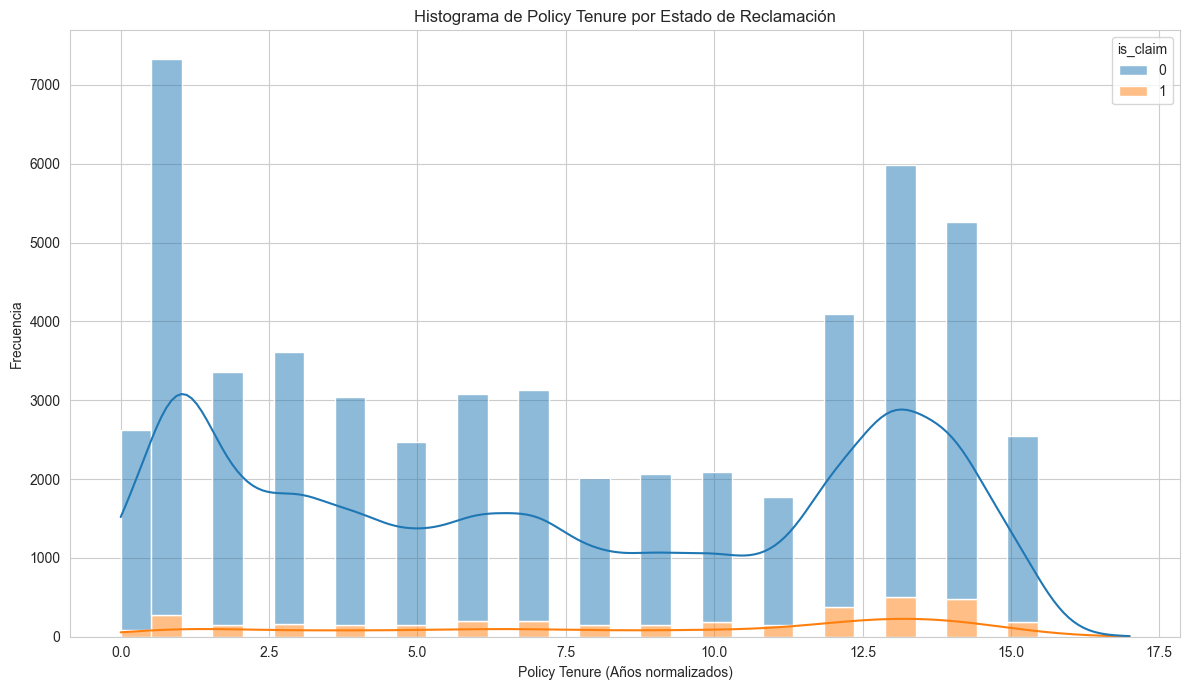

In [54]:
import matplotlib.pyplot as plt
fig = px.box(df_clean, x='is_claim', y='policy_tenure',
                 title='Distribución de Policy Tenure vs. Reclamación',
                 labels={'is_claim': 'Reclamación (0=No, 1=Sí)', 'policy_tenure': 'Policy Tenure (Años normalizados)'},
                 color='is_claim')  # Color the boxes by 'is_claim'
fig.show()


plt.figure()
sns.histplot(data=df_clean, x='policy_tenure', hue='is_claim', kde=True, multiple="stack")
plt.title('Histograma de Policy Tenure por Estado de Reclamación')
plt.xlabel('Policy Tenure (Años normalizados)')
plt.ylabel('Frecuencia')
plt.show()







In [55]:
# 2. age_of_policyholder (Edad del titular de la póliza)
print("\n--- Análisis de 'age_of_policyholder' ---")
print(f"Media de age_of_policyholder (con reclamación): {claimed_df['age_of_policyholder'].mean():.2f} años")
print(f"Media de age_of_policyholder (sin reclamación): {not_claimed_df['age_of_policyholder'].mean():.2f} años")
print(f"Mediana de age_of_policyholder (con reclamación): {claimed_df['age_of_policyholder'].median():.2f} años")
print(f"Mediana de age_of_policyholder (sin reclamación): {not_claimed_df['age_of_policyholder'].median():.2f} años")



--- Análisis de 'age_of_policyholder' ---
Media de age_of_policyholder (con reclamación): 47.72 años
Media de age_of_policyholder (sin reclamación): 46.73 años
Mediana de age_of_policyholder (con reclamación): 46.00 años
Mediana de age_of_policyholder (sin reclamación): 45.00 años


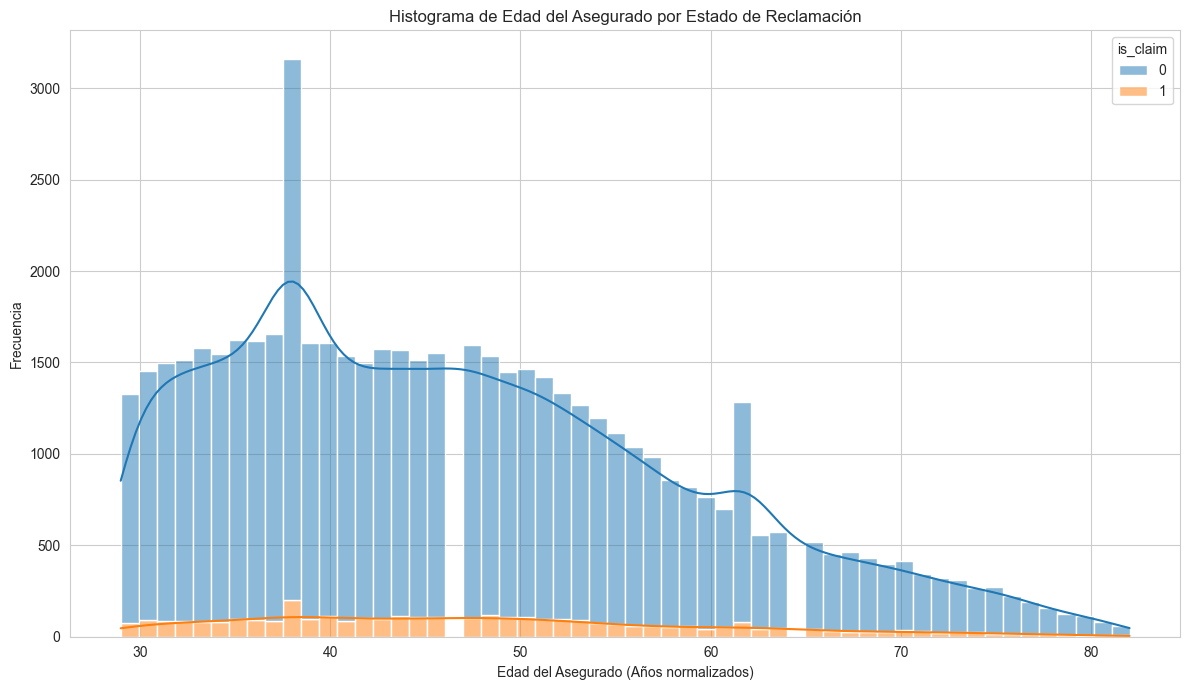

In [57]:
import matplotlib.pyplot as plt
fig = px.box(df_clean, x='is_claim', y='age_of_policyholder',
                 title='Distribución de age_of_policyholder vs. Reclamación',
                 labels={'is_claim': 'Reclamación (0=No, 1=Sí)', 'age_of_policyholder': 'age_of_policyholder (Años normalizados)'},
                 color='is_claim')  # Color the boxes by 'is_claim'
fig.show()

plt.figure()
sns.histplot(data=df_clean, x='age_of_policyholder', hue='is_claim', kde=True, multiple="stack")
plt.title('Histograma de Edad del Asegurado por Estado de Reclamación')
plt.xlabel('Edad del Asegurado (Años normalizados)')
plt.ylabel('Frecuencia')
plt.show()

In [65]:
# 2. airbags (Numero de Airbags en el vehiculo)
print("\n--- Análisis de 'airbags' ---")
print(f"Media de airbags (con reclamación): {int(claimed_df['airbags'].mean())} bolsas")
print(f"Media de airbags (sin reclamación): {int(not_claimed_df['airbags'].mean())} bolsas")
print(f"Mediana de airbags (con reclamación): {int(claimed_df['airbags'].median())} bolsas")
print(f"Mediana de airbags (sin reclamación): {int(not_claimed_df['airbags'].median())} bolsas")



--- Análisis de 'airbags' ---
Media de airbags (con reclamación): 3 bolsas
Media de airbags (sin reclamación): 3 bolsas
Mediana de airbags (con reclamación): 2 bolsas
Mediana de airbags (sin reclamación): 2 bolsas


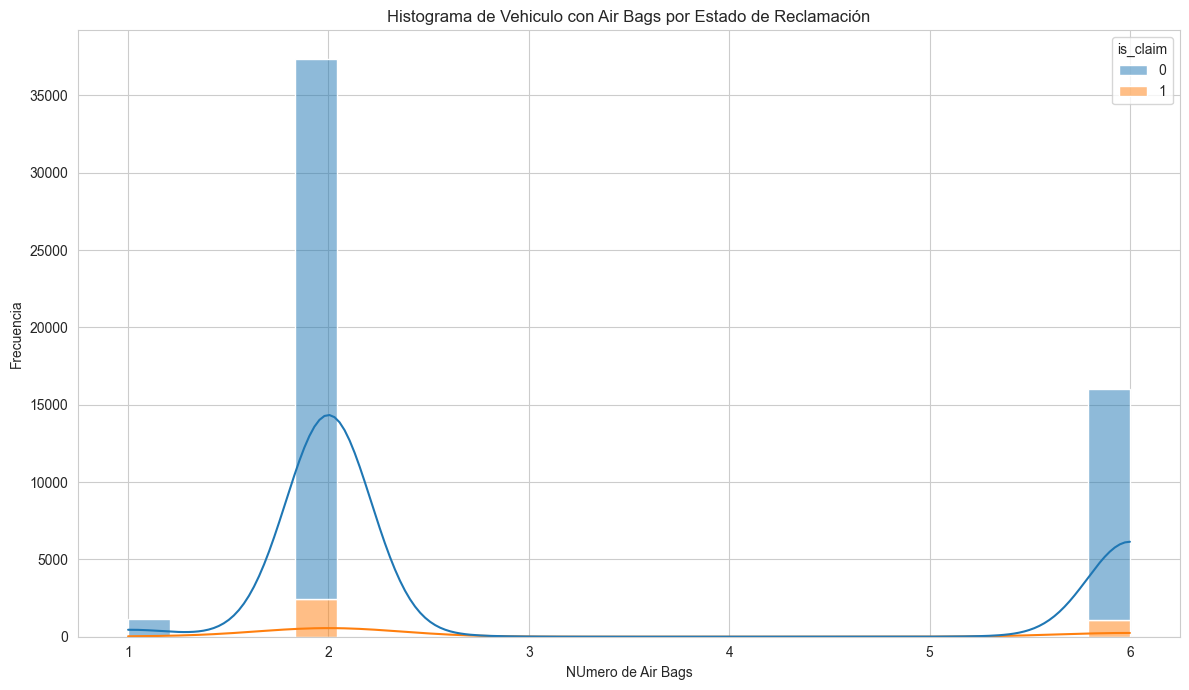

In [69]:
fig = px.box(df_clean, x='is_claim', y='airbags',
                 title='Distribución de Air Bags vs. Reclamación',
                 labels={'is_claim': 'Reclamación (0=No, 1=Sí)', 'airbags': '# Air Bags'},
                 color='is_claim')  # Color the boxes by 'is_claim'
fig.show()

plt.figure()
sns.histplot(data=df_clean, x='airbags', hue='is_claim', kde=True, multiple="stack")
plt.title('Histograma de Vehiculo con Air Bags por Estado de Reclamación')
plt.xlabel('NUmero de Air Bags')
plt.ylabel('Frecuencia')
plt.show()

In [67]:
print("\n--- Análisis de 'cylinder' ---")
print(f"Media de cylinder (con reclamación): {int(claimed_df['cylinder'].mean())} cylinder")
print(f"Media de cylinder (sin reclamación): {int(not_claimed_df['cylinder'].mean())} cylinder")
print(f"Mediana de cylinder (con reclamación): {int(claimed_df['cylinder'].median())} cylinder")
print(f"Mediana de cylinder (sin reclamación): {int(not_claimed_df['cylinder'].median())} cylinder")


--- Análisis de 'cylinder' ---
Media de cylinder (con reclamación): 3 cylinder
Media de cylinder (sin reclamación): 3 cylinder
Mediana de cylinder (con reclamación): 4 cylinder
Mediana de cylinder (sin reclamación): 4 cylinder


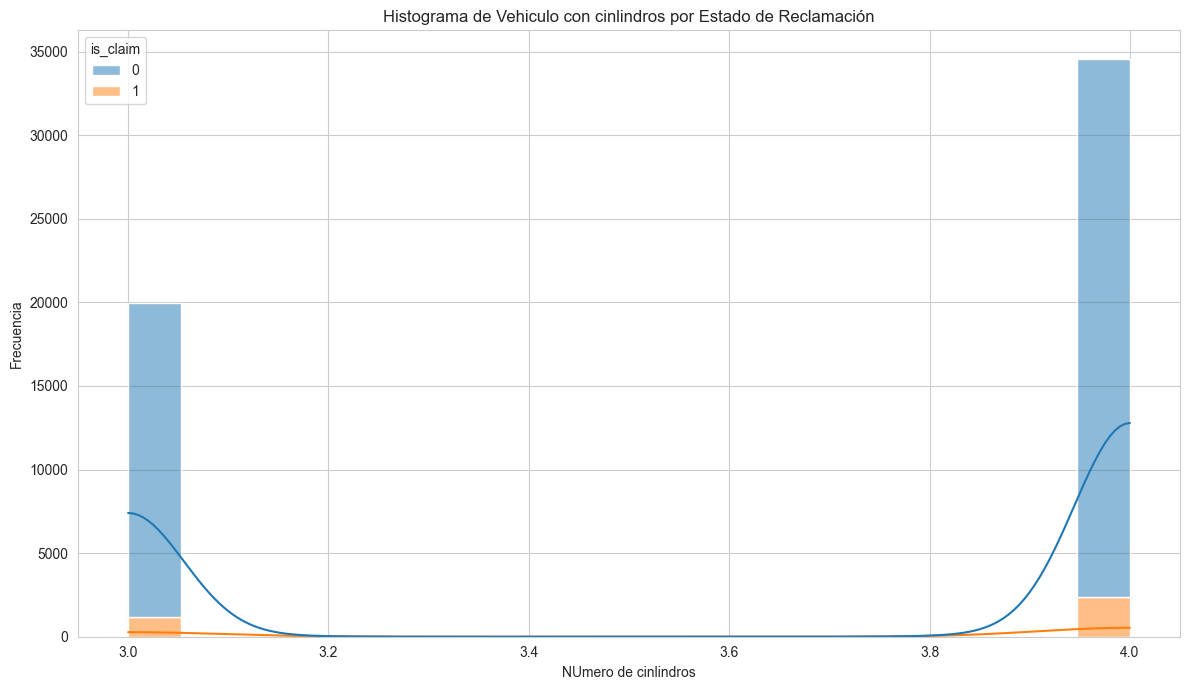

In [70]:
fig = px.box(df_clean, x='is_claim', y='cylinder',
                 title='Distribución de auto con cilindros vs. Reclamación',
                 labels={'is_claim': 'Reclamación (0=No, 1=Sí)', 'cylinder': 'cinlindros'},
                 color='is_claim')  # Color the boxes by 'is_claim'
fig.show()

plt.figure()
sns.histplot(data=df_clean, x='cylinder', hue='is_claim', kde=True, multiple="stack")
plt.title('Histograma de Vehiculo con cinlindros por Estado de Reclamación')
plt.xlabel('NUmero de cinlindros')
plt.ylabel('Frecuencia')
plt.show()

In [73]:
# 2. transmission_type (Tipo de transmisión del coche)
print("\n--- Análisis de 'transmission_type' ---")
print(f"Valores únicos en 'transmission_type': {df_clean['transmission_type'].unique()}") # Para verificar si 'Automatic' está presente

prob_claim_transmission = df_clean.groupby('transmission_type')['is_claim'].mean().reset_index()
prob_claim_transmission.rename(columns={'is_claim': 'probability_of_claim'}, inplace=True)


--- Análisis de 'transmission_type' ---
Valores únicos en 'transmission_type': ['Manual' 'Automatic']


C:\Users\nervi\AppData\Local\Temp\ipykernel_5644\269537080.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




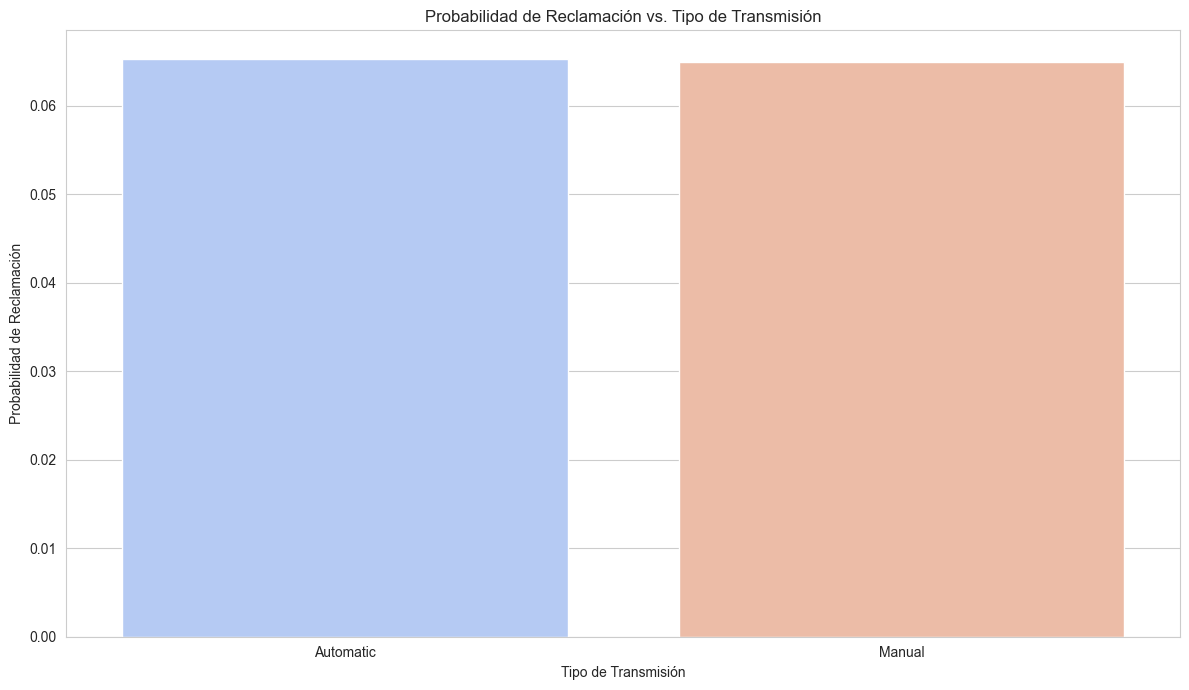

In [74]:
plt.figure()
sns.barplot(x='transmission_type', y='probability_of_claim', data=prob_claim_transmission, palette='coolwarm', order=prob_claim_transmission.sort_values('probability_of_claim', ascending=False)['transmission_type'])
plt.title('Probabilidad de Reclamación vs. Tipo de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Probabilidad de Reclamación')
plt.show()


--- Análisis de 'airbags' ---
Valores únicos en 'airbags': [2 6 1]


C:\Users\nervi\AppData\Local\Temp\ipykernel_5644\55287421.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




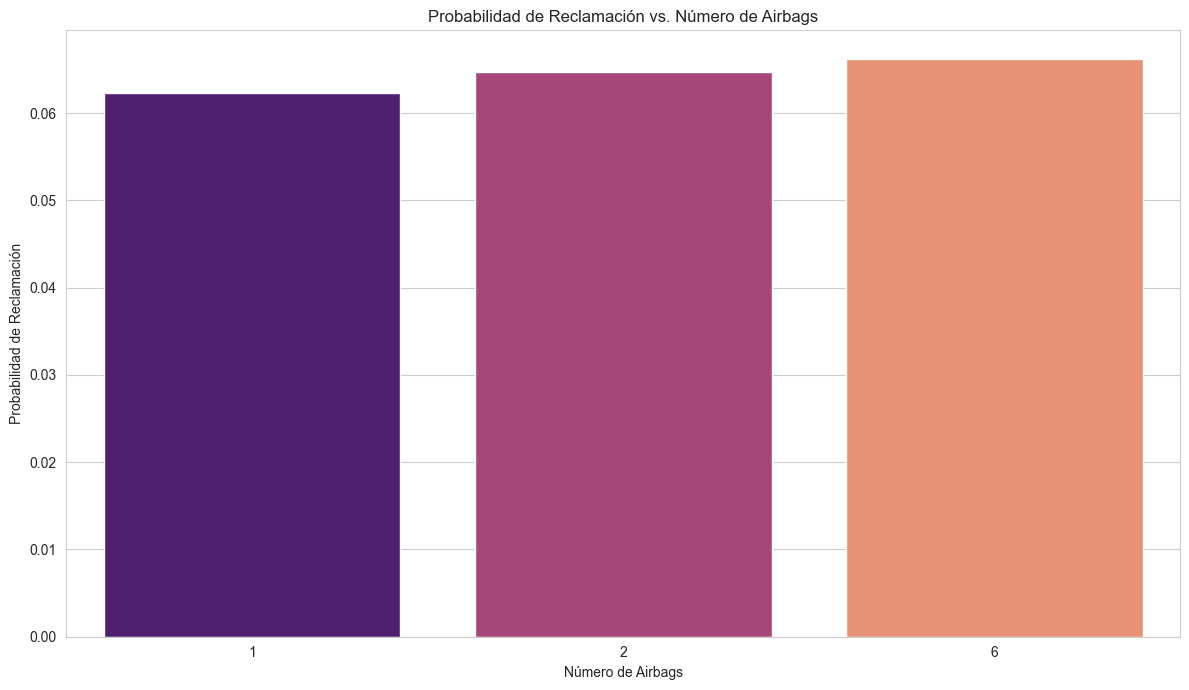

In [75]:

# 3. airbags (Número de airbags instalados)
print("\n--- Análisis de 'airbags' ---")
print(f"Valores únicos en 'airbags': {df_clean['airbags'].unique()}")
prob_claim_airbags = df_clean.groupby('airbags')['is_claim'].mean().reset_index()
prob_claim_airbags.rename(columns={'is_claim': 'probability_of_claim'}, inplace=True)

plt.figure()
sns.barplot(x='airbags', y='probability_of_claim', data=prob_claim_airbags, palette='magma')
plt.title('Probabilidad de Reclamación vs. Número de Airbags')
plt.xlabel('Número de Airbags')
plt.ylabel('Probabilidad de Reclamación')
plt.show()


--- Análisis de 'engine_type' (relacionado con motor/cilindros) ---
Valores únicos en 'engine_type': ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']


C:\Users\nervi\AppData\Local\Temp\ipykernel_5644\1947818870.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




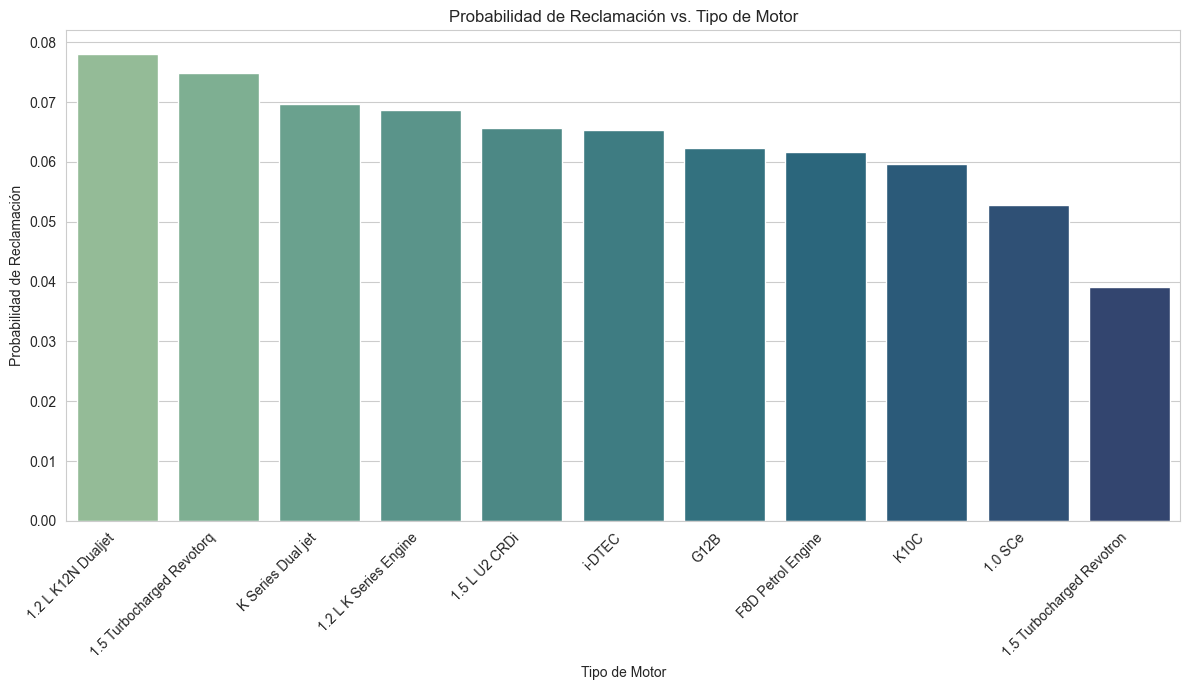

In [76]:
# 4. engine_type (Tipo de motor usado en el coche)
print("\n--- Análisis de 'engine_type' (relacionado con motor/cilindros) ---")
print(f"Valores únicos en 'engine_type': {df_clean['engine_type'].unique()}")

prob_claim_engine = df_clean.groupby('engine_type')['is_claim'].mean().reset_index()
prob_claim_engine.rename(columns={'is_claim': 'probability_of_claim'}, inplace=True)

plt.figure()
sns.barplot(x='engine_type', y='probability_of_claim', data=prob_claim_engine, palette='crest', order=prob_claim_engine.sort_values('probability_of_claim', ascending=False)['engine_type'])
plt.title('Probabilidad de Reclamación vs. Tipo de Motor')
plt.xlabel('Tipo de Motor')
plt.ylabel('Probabilidad de Reclamación')
plt.xticks(rotation=45, ha='right')
plt.show()